In [23]:
#Importing required libraries
 
import numpy as np
import random
import csv
import pandas as pd
import math
import matplotlib.pyplot as plt


class TransitionModel:
    V_min=-5
    V_max=5
    points=4000 

    States=['I','II','III','X']
    
    def __init__(self, state='I'):
        self.state=state
        if state== 'I':  
            self.Voltage = np.linspace(0,TransitionModel.V_max, 2000)
            self.meanI = 0
            self.meanII = random.randrange(2500, 42500, 25)/10000 # mean to represent transition to state II
            self.meanIII = random.randrange(math.ceil((self.meanI+0.25)*10000), 45000, 25)/10000
            self.meanX_1 = random.randrange(math.ceil((self.meanII+0.25)*10000), 50000, 25)/10000
        elif state== 'II':       
            self.Voltage = np.linspace(TransitionModel.V_min,TransitionModel.V_max,TransitionModel.points)
            self.meanI=-random.randrange(5000, 42500, 25)/10000 #to state I
            self.meanII=0
            self.meanIII=random.randrange(5000, 42500, 25)/10000
            self.meanX_1 = random.randrange(math.ceil((self.meanIII+0.25)*10000), 50000, 25)/10000
            self.meanX_2 = -random.randrange(math.ceil((abs(self.meanI)+0.25)*10000), 45000, 25)/10000 #for the negative polarity fail 
        elif state== 'III':   
            self.Voltage = np.linspace(TransitionModel.V_min,0,TransitionModel.points/2)
            self.meanIII=0
            self.meanII = -random.randrange(2500, 42500, 25)/10000 # mean to represent transition to state II
            self.meanI = -random.randrange(math.ceil((self.meanII+0.25)*10000), 45000, 25)/10000
            self.meanX2 = -random.randrange(math.ceil((self.meanI+0.25)*10000), 50000, 25)/10000
            
            
    def normal_dist(self, x , mean , sd=1):
        prob_density = (1/(sd*(2*np.pi)**(0.5)))* np.exp(-0.5*((x-mean)/sd)**2)
        return prob_density
    
    def generate_probablity(self):
        self.prob_I=normal_dist(self.Voltage,self.meanI)
        self.prob_II=normal_dist(self.Voltage,self.meanII)
        self.prob_III=normal_dist(self.Voltage,self.self.meanIII)
        self.prob_X1=normal_dist(self.Voltage,self.meanX_1)
        self.prob_X2=normal_dist(self.Voltage,self.meanX_2)
        
        if state== 'I': 
            self.prob_I=normal_dist(self.Voltage,self.meanI)/normal_dist(0,0)
            self.prob_X2=normal_dist(self.Voltage,self.meanX_2)/0
        elif state== 'II': 
            self.prob_II=normal_dist(self.Voltage,self.meanII)/normal_dist(0,0)   
        elif state== 'III':
            self.prob_III=normal_dist(self.Voltage,self.self.meanIII)/normal_dist(0,0)
            self.prob_X1=normal_dist(self.Voltage,self.meanX_1)/0
            
        Cumulative_prob=self.prob_I + self.prob_II + self.prob_III + self.prob_X1 +self.prob_X2
        
        self.prob_I= self.prob_I/ Cumulative_prob
        self.prob_II= self.prob_II/ Cumulative_prob
        self.prob_III= self.prob_III/ Cumulative_prob
        self.prob_X1= self.prob_X1/ Cumulative_prob
        self.prob_X2= self.prob_X2/ Cumulative_prob
        combined_list=[self.prob_I, self.prob_II, self.prob_III, self.prob_X1, self.prob_X2]
        return combined_list
        
    def plot_pdf(self):
        
        fig = plt.figure( )  
        plt.plot(self.Voltage, self.prob_I , color = 'green')
        plt.plot(self.Voltage, self.prob_II , color = 'blue')
        plt.plot(self.Voltage, self.prob_III , color = 'black')
        plt.plot(self.Voltage, self.prob_X1 , color = 'red')
        plt.plot(self.Voltage, self.prob_X2 , color = 'red')
        
        plt.title('Trantition for state '+ str(self.state))
        plt.legend([str(self.state)+" to I",str(self.state)+" to II", 
                    str(self.state)+" to III",str(self.state)+ " to X"])
        plt.xlabel('Voltage')
        plt.ylabel('Probability Density')

        plt.show()



In [ ]:
mod1=TransitionModel()
mod1.plot_pdf()

In [74]:
#Importing required libraries
 
import numpy as np
import random
import csv
import pandas as pd
import math
import matplotlib.pyplot as plt

def normal_dist( x , mean , sd=1):
        prob_density = (1/(sd*(2*np.pi)**(0.5)))* np.exp(-0.5*((x-mean)/sd)**2)
        return prob_density
    
class TransitionModel:
    V_min=-5
    V_max=5
    points=4000 

    States=['I','II','III','X']
    
    def __init__(self, state='I'):
        self.state=state
        if state== 'I':  
            self.Voltage = np.linspace(0,TransitionModel.V_max, 2000)
            self.meanI = 0
            self.meanII = random.randrange(2500, 42500, 25)/10000 # mean to represent transition to state II
            self.meanIII = random.randrange(math.ceil((self.meanI+0.25)*10000), 45000, 25)/10000
            self.meanX_1 = random.randrange(math.ceil((self.meanII+0.25)*10000), 50000, 25)/10000
            self.meanX_2=0
        elif state== 'II':       
            self.Voltage = np.linspace(TransitionModel.V_min,TransitionModel.V_max,TransitionModel.points)
            self.meanI=-random.randrange(5000, 42500, 25)/10000 #to state I
            self.meanII=0
            self.meanIII=random.randrange(5000, 42500, 25)/10000
            self.meanX_1 = random.randrange(math.ceil((self.meanIII+0.25)*10000), 50000, 25)/10000
            self.meanX_2 = -random.randrange(math.ceil((abs(self.meanI)+0.25)*10000), 45000, 25)/10000 #for the negative polarity fail 
        elif state== 'III':   
            self.Voltage = np.linspace(TransitionModel.V_min,0,2000)
            self.meanIII=0
            self.meanII = -random.randrange(2500, 42500, 25)/10000 # mean to represent transition to state II
            self.meanI = -random.randrange(math.ceil((self.meanII+0.25)*10000), 45000, 25)/10000
            self.meanX_1 =0
            self.meanX_2 = -random.randrange(math.ceil((self.meanI+0.25)*10000), 50000, 25)/10000
            
        self.prob_I=normal_dist(self.Voltage,self.meanI)
        self.prob_II=normal_dist(self.Voltage,self.meanII)
        self.prob_III=normal_dist(self.Voltage,self.meanIII)
        self.prob_X1=normal_dist(self.Voltage,self.meanX_1)
        self.prob_X2=normal_dist(self.Voltage,self.meanX_2)
        
        if state== 'I': 
            self.prob_I=normal_dist(self.Voltage,self.meanI)/normal_dist(0,0)
            self.prob_X2= 0
        elif state== 'II': 
            self.prob_II=normal_dist(self.Voltage,self.meanII)/normal_dist(0,0)   
        elif state== 'III':
            self.prob_III=normal_dist(self.Voltage, self.meanIII)/normal_dist(0,0)
            self.prob_X1= 0
            
        Cumulative_prob=self.prob_I + self.prob_II + self.prob_III + self.prob_X1 +self.prob_X2
        
        self.prob_I= self.prob_I/ Cumulative_prob
        self.prob_II= self.prob_II/ Cumulative_prob
        self.prob_III= self.prob_III/ Cumulative_prob
        self.prob_X1= self.prob_X1/ Cumulative_prob
        self.prob_X2= self.prob_X2/ Cumulative_prob
            
            
    
    
    def data_frame(self):
        data = {'State':self.state,'Voltage':self.Voltage, 'prob_I':self.prob_I  ,
        'prob_II': self.prob_II, 'prob_III': self.prob_III,'prob_X1': self.prob_X1,'prob_X2': self.prob_X2 } 

        # Creating DataFrame
        df = pd.DataFrame(data)
        return df
        
    def plot_pdf(self):
        
        fig = plt.figure( )  
        plt.plot(self.Voltage, self.prob_I , color = 'green')
        plt.plot(self.Voltage, self.prob_II , color = 'blue')
        plt.plot(self.Voltage, self.prob_III , color = 'black')
        plt.plot(self.Voltage, self.prob_X1 , color = 'red')
        plt.plot(self.Voltage, self.prob_X2 , color = 'red')
        
        plt.title('Trantition from state '+ str(self.state))
        plt.legend([str(self.state)+" to I",str(self.state)+" to II", 
                    str(self.state)+" to III",str(self.state)+ " to X"])
        plt.xlabel('Voltage')
        plt.ylabel('Probability Density')

        plt.show()




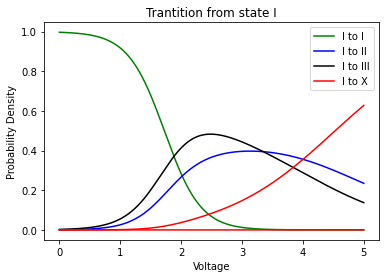

,State,Voltage,prob_I,prob_II,prob_III,prob_X1,prob_X2
0,I,0.000000,0.996651,0.000840,0.002493,0.000016,0.0
1,I,0.002501,0.996624,0.000847,0.002513,0.000016,0.0
2,I,0.005003,0.996596,0.000855,0.002533,0.000017,0.0
3,I,0.007504,0.996568,0.000862,0.002553,0.000017,0.0
4,I,0.010005,0.996540,0.000870,0.002573,0.000017,0.0
...,...,...,...,...,...,...,...
1995,I,4.989995,0.000007,0.236327,0.138574,0.625092,0.0
1996,I,4.992496,0.000007,0.235990,0.138264,0.625740,0.0
1997,I,4.994997,0.000007,0.235652,0.137954,0.626387,0.0
1998,I,4.997499,0.000007,0.235315,0.137645,0.627033,0.0


In [86]:
model_1=TransitionModel(state='I')
mod1.plot_pdf()
mod1.data_frame()

In [128]:
#select a random voltage within the range 
#use module to take the probablities of transition  
#Make the next state the current state and repeat process 

n=10 #number of iteration
states=['I', 'II','III','X1','X2']
Vb=1.001 #can change to select random
current_state='I'
path=[]
destinations=[]
for i in range(0,n):
    model=TransitionModel(state=current_state)
    data=mod1.data_frame()
    filt=data['Voltage'].round(3)==Vb
    probablity=data[filt][['prob_I','prob_II','prob_III','prob_X1','prob_X2']].values.tolist()
    next_state = np.random.choice(states,replace=True,p=probablity[0])
    path.append(next_state)
    current_state=next_state 
    last_destination=path[-1]
    
destinations.append(last_destination) 
 


III


['I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'I', 'III']